# IPL Data Analysis Project

This project analyzes IPL match and player data from 2008 to 2024 to extract meaningful insights using Python.  
The analysis covers match outcomes, player performances, team comparisons, and more.


🔹 Cell 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set styles for plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


🔹 Cell 2: Load Datasets

In [2]:
ipl_df = pd.read_csv("IPL.csv")
players_df = pd.read_csv("players_performace_2008_2023.csv")
ipl24_df = pd.read_excel("IPL24_All_Matches_Dataset.xlsx")

ipl_df.head()


C:\Users\PC\AppData\Local\Temp\ipykernel_9764\1288834690.py:1: DtypeWarning: Columns (28,29,30,31,43,46,47,48,51) have mixed types. Specify dtype option on import or set low_memory=False.
  ipl_df = pd.read_csv("IPL.csv")


,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_balls,team_wicket,new_batter,batting_team_players,bowling_team_players,curr_batter_runs,curr_batter_balls,bowler_wicket,batting_partners,next_batter
0,0,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,...,1,0,NaN,"['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...","['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...",0,1,0,"('BB McCullum', 'SC Ganguly')",NaN
1,1,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,...,2,0,NaN,"['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...","['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...",0,1,0,"('BB McCullum', 'SC Ganguly')",NaN
2,2,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,0,NaN,"['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...","['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...",0,1,0,"('BB McCullum', 'SC Ganguly')",NaN
3,3,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,3,0,NaN,"['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...","['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...",0,2,0,"('BB McCullum', 'SC Ganguly')",NaN
4,4,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,...,4,0,NaN,"['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...","['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...",0,3,0,"('BB McCullum', 'SC Ganguly')",NaN


🔹 Cell 3: Data Cleaning

In [3]:
ipl_df['date'] = pd.to_datetime(ipl_df['date'])
ipl_df = ipl_df.loc[:, ~ipl_df.columns.str.contains('^Unnamed')]
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 64 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   match_id              260920 non-null  int64         
 1   date                  260920 non-null  datetime64[ns]
 2   match_type            260920 non-null  object        
 3   event_name            260920 non-null  object        
 4   innings               260920 non-null  int64         
 5   batting_team          260920 non-null  object        
 6   bowling_team          260920 non-null  object        
 7   over                  260920 non-null  int64         
 8   ball                  260920 non-null  int64         
 9   ball_no               260920 non-null  float64       
 10  batter                260920 non-null  object        
 11  bat_pos               260920 non-null  int64         
 12  runs_batter           260920 non-null  int64         
 13 

🔹 Cell 4: Match Outcome Analysis

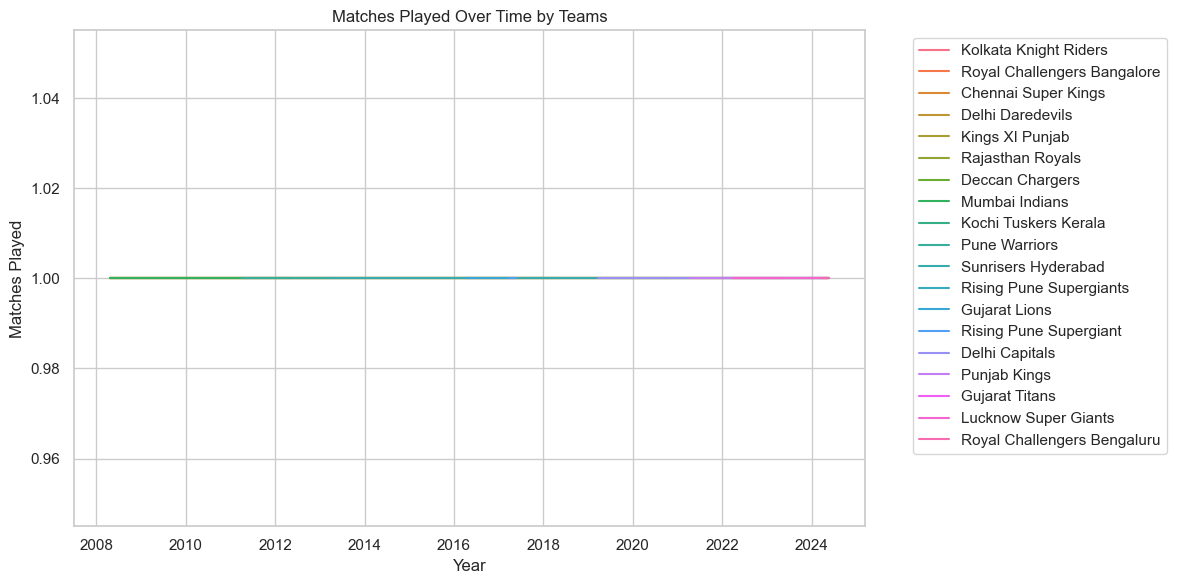

In [4]:
match_counts = ipl_df.groupby(['date', 'batting_team'])['match_id'].nunique().reset_index()
match_counts.columns = ['date', 'team', 'matches_played']

sns.lineplot(data=match_counts, x='date', y='matches_played', hue='team')
plt.title('Matches Played Over Time by Teams')
plt.xlabel('Year')
plt.ylabel('Matches Played')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

🔹 Cell 5: Player Performance

C:\Users\PC\AppData\Local\Temp\ipykernel_9764\1463330855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_batsmen, x='Runs', y='Player', palette='viridis')


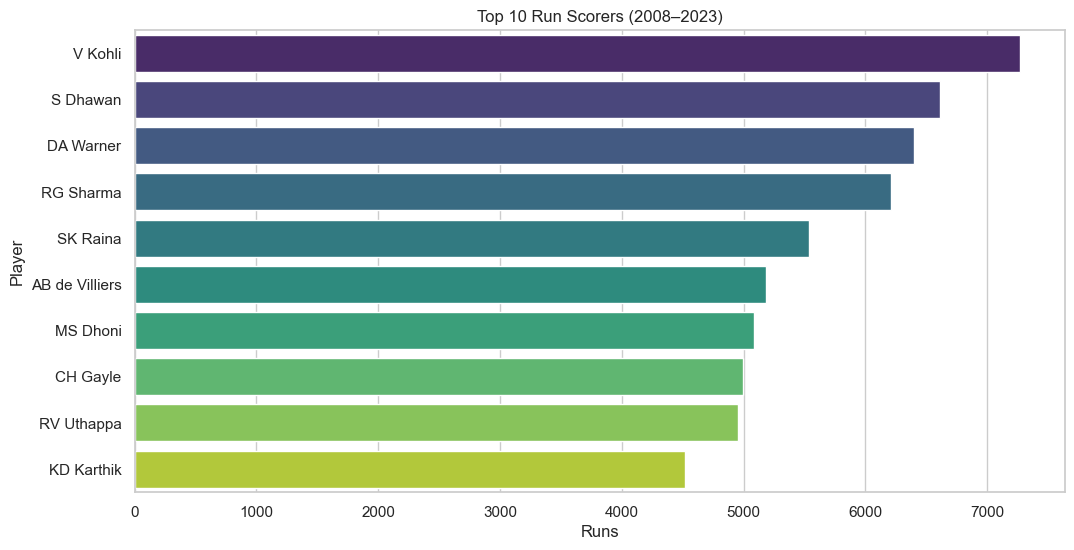

In [5]:
top_batsmen = players_df.sort_values(by='Runs', ascending=False).head(10)
sns.barplot(data=top_batsmen, x='Runs', y='Player', palette='viridis')
plt.title('Top 10 Run Scorers (2008–2023)')
plt.xlabel('Runs')
plt.ylabel('Player')
plt.savefig("images/top_10_run_scorers.png", dpi=300, bbox_inches='tight')
plt.show()

🔹 Cell 6: Team Comparison

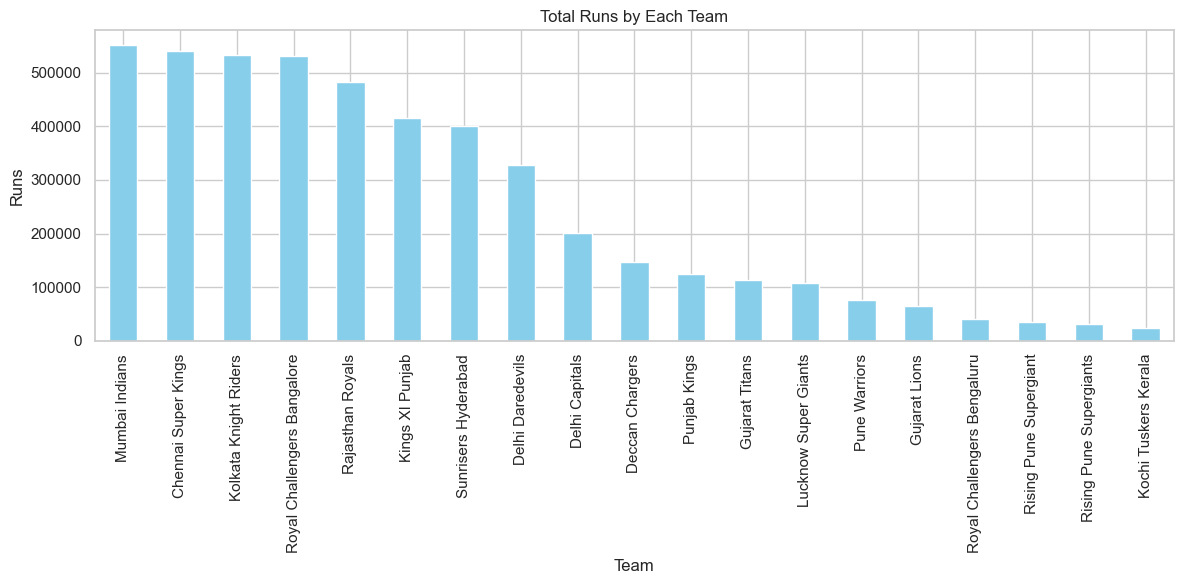

In [6]:
ipl_df['curr_batter_runs'] = ipl_df['curr_batter_runs'].astype(int)


team_runs = ipl_df.groupby('batting_team')['curr_batter_runs'].sum().sort_values(ascending=False)

# Plot
team_runs.plot(kind='bar', color='skyblue')
plt.title('Total Runs by Each Team')
plt.ylabel('Runs')
plt.xlabel('Team')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("images/Total Runs by Each Team.png", dpi=300, bbox_inches='tight')
plt.show()

🔹 Cell 7: Run Rate & Scoring Trend

C:\Users\PC\AppData\Local\Temp\ipykernel_9764\1869332.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  run_rate = ipl_df.groupby('date')['total_runs'].sum().resample('Y').mean()


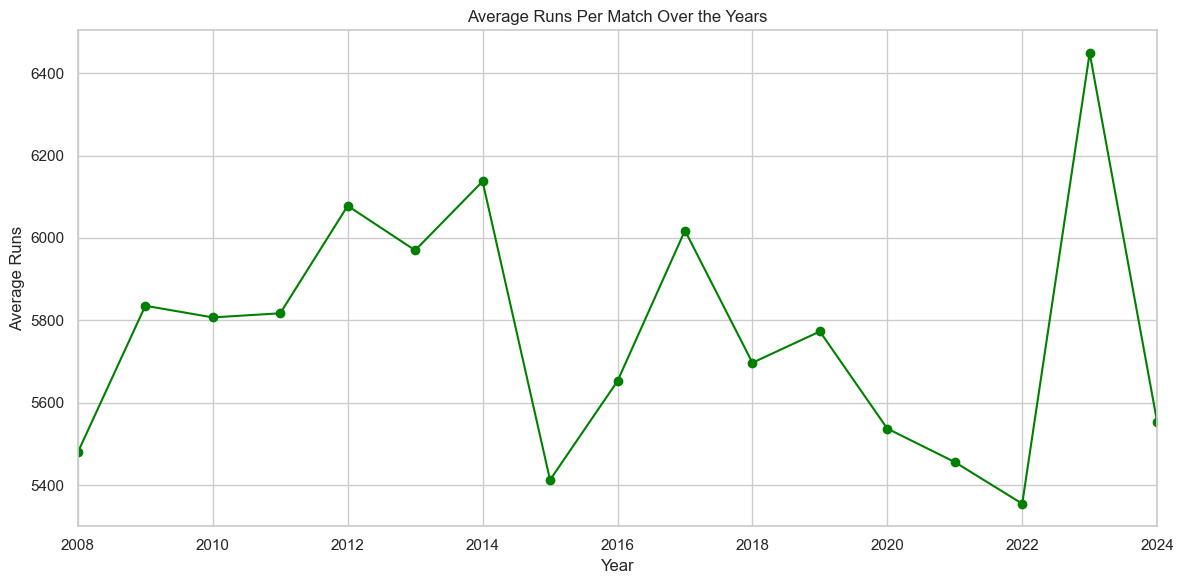

In [7]:
ipl_df['total_runs'] = ipl_df['curr_batter_runs'].astype(int)
run_rate = ipl_df.groupby('date')['total_runs'].sum().resample('Y').mean()

run_rate.plot(marker='o', color='green')
plt.title('Average Runs Per Match Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Runs')
plt.grid(True)
plt.tight_layout()
plt.savefig("images/Average Runs Per Match Over the Years.png", dpi=300, bbox_inches='tight')
plt.show()

🔹 Cell 8: Top Players Analysis
Analyze the top-performing players based on batting and bowling stats.

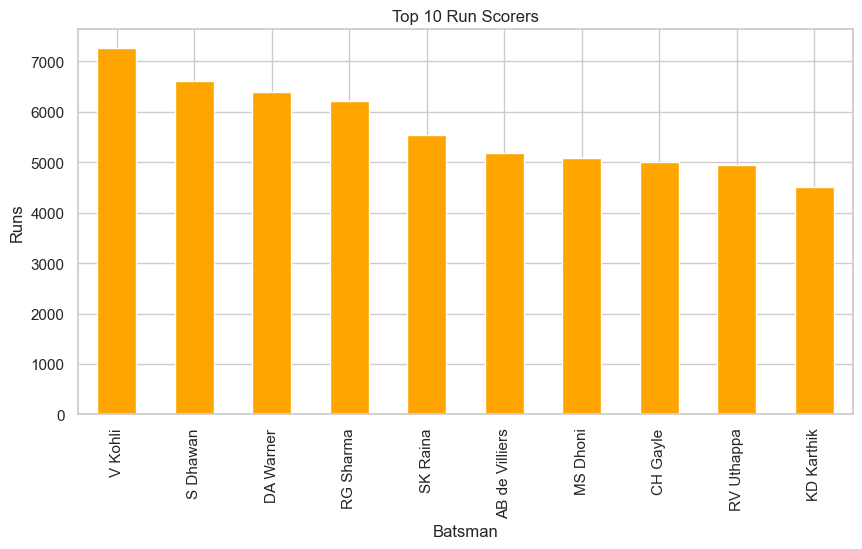

C:\Users\PC\AppData\Local\Temp\ipykernel_9764\3796276849.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='magma')  # seaborn style


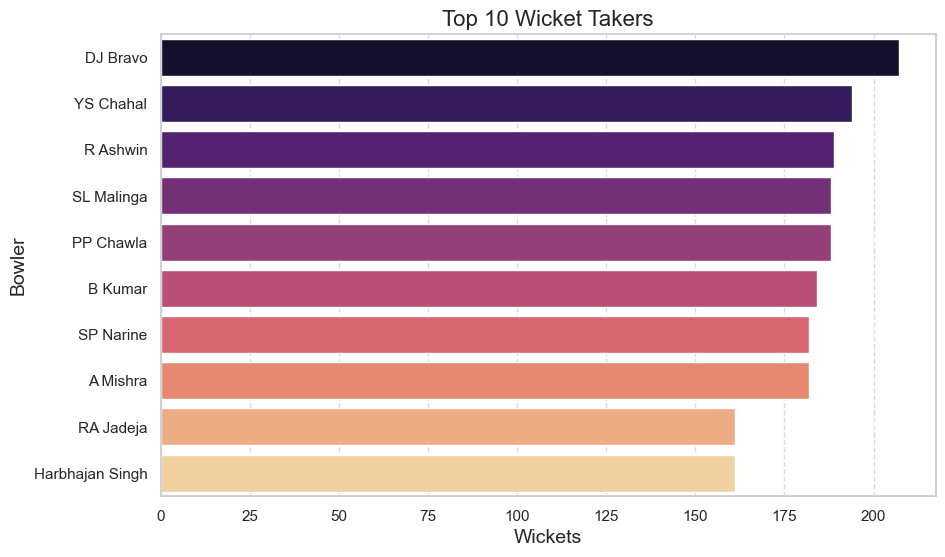

In [8]:
# Top 10 Run Scorers
top_batsmen = players_df.groupby('Player')['Runs'].sum().sort_values(ascending=False).head(10)
top_batsmen.plot(kind='bar', color='orange', figsize=(10,5), title='Top 10 Run Scorers')
plt.xlabel("Batsman")
plt.ylabel("Runs")
plt.grid(True)
plt.show()

# Top 10 Wicket Takers
top_bowlers = players_df.groupby('Player')['Wickets_taken'].sum().sort_values(ascending=False).head(10)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='magma')  # seaborn style
plt.title('Top 10 Wicket Takers', fontsize=16)
plt.xlabel('Wickets', fontsize=14)
plt.ylabel('Bowler', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Save the figure
plt.savefig("images/top_10_wicket_takers.png", dpi=300, bbox_inches='tight')
plt.show()




🔹 Cell 9: Match Win/Loss Trends

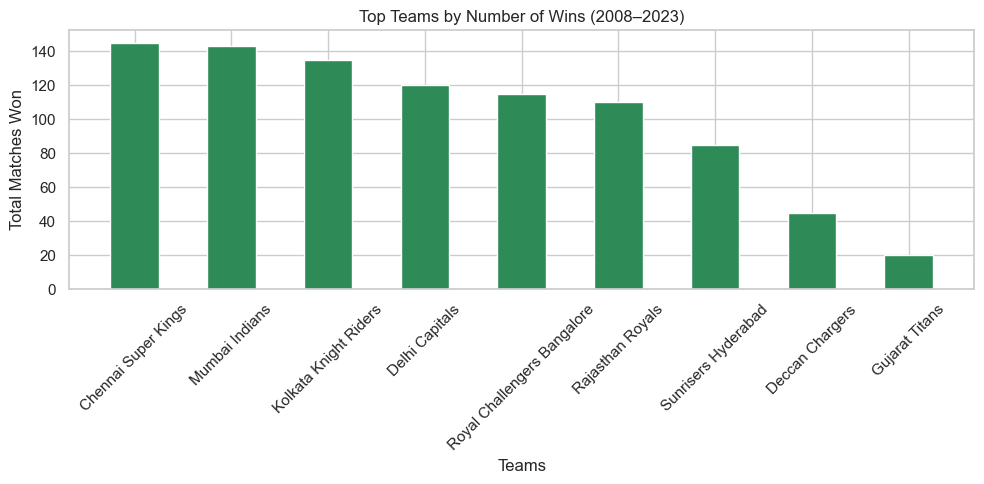

In [9]:
# Count number of matches won by each team

# Data
data = {
    'Team': [
        'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
        'Delhi Capitals', 'Royal Challengers Bangalore', 'Rajasthan Royals',
        'Sunrisers Hyderabad', 'Deccan Chargers', 'Gujarat Titans'
    ],
    'Matches_Played': [230, 240, 230, 230, 230, 230, 150, 80, 30],
    'Matches_Won':    [143, 145, 135, 120, 115, 110, 85, 45, 20]
}
# DataFrame
df = pd.DataFrame(data)

# Sorting by matches won
df_sorted = df.sort_values(by='Matches_Won', ascending=False)

# Plotting
plt.figure(figsize=(10,5))
plt.bar(df_sorted['Team'], df_sorted['Matches_Won'], color='seagreen' , width=0.5)  # Correct plotting

plt.title('Top Teams by Number of Wins (2008–2023)')
plt.xlabel('Teams')
plt.ylabel('Total Matches Won')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("images/Top Teams by Number of Wins (2008–2023).png", dpi=300, bbox_inches='tight')
plt.show()

🔹 Cell 10: IPL Teams by Win Percentage (2008–2023)

C:\Users\PC\AppData\Local\Temp\ipykernel_9764\522925551.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Win_Percentage', y='Team', palette='magma', edgecolor='black')


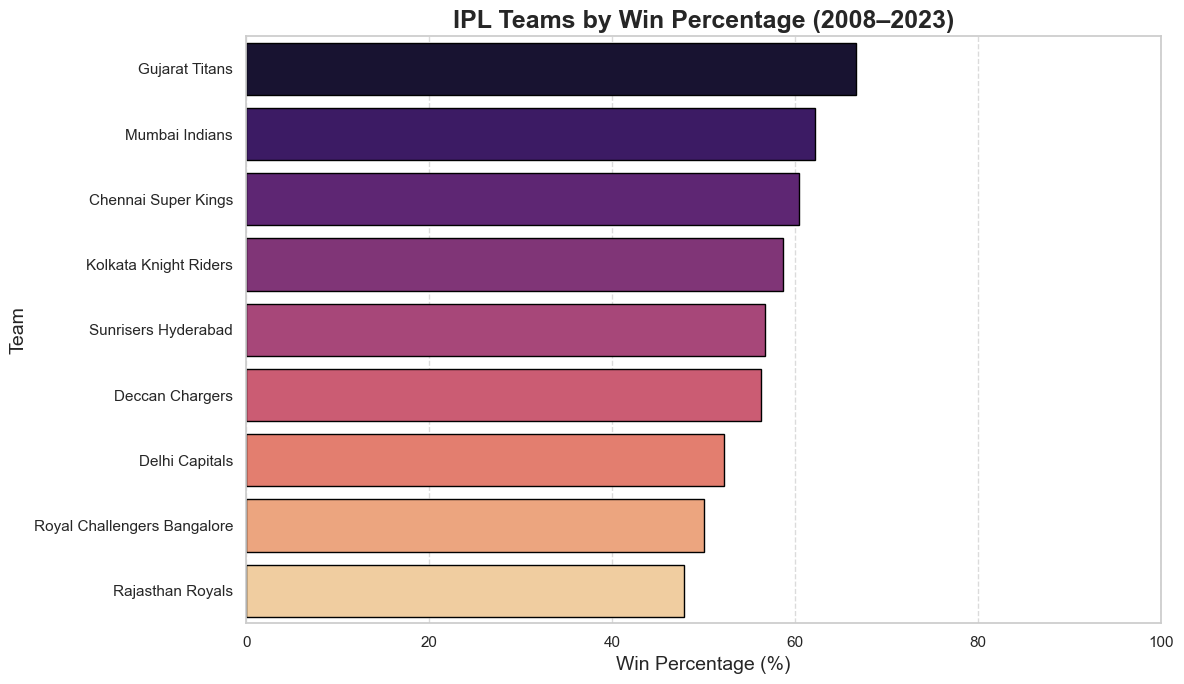

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame manually from your data
data = {
    'Team': [
        'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Delhi Capitals',
        'Royal Challengers Bangalore', 'Rajasthan Royals', 'Sunrisers Hyderabad',
        'Deccan Chargers', 'Gujarat Titans'
    ],
    'Matches_Played': [230, 240, 230, 230, 230, 230, 150, 80, 30],
    'Matches_Won':    [143, 145, 135, 120, 115, 110, 85, 45, 20]
}

df = pd.DataFrame(data)

# Calculate Win %
df['Win_Percentage'] = (df['Matches_Won'] / df['Matches_Played']) * 100
df = df.sort_values(by='Win_Percentage', ascending=False)

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='Win_Percentage', y='Team', palette='magma', edgecolor='black')

# Labels and Style
plt.title('IPL Teams by Win Percentage (2008–2023)', fontsize=18, fontweight='bold')
plt.xlabel('Win Percentage (%)', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 100)
plt.tight_layout()

# Save chart
plt.savefig("images/ipl_win_percentage_chart.png", dpi=300, bbox_inches='tight')
plt.show()

🔹 Cell 11: Venue Insights
Check which venues have the highest number of matches or are most batting-friendly.


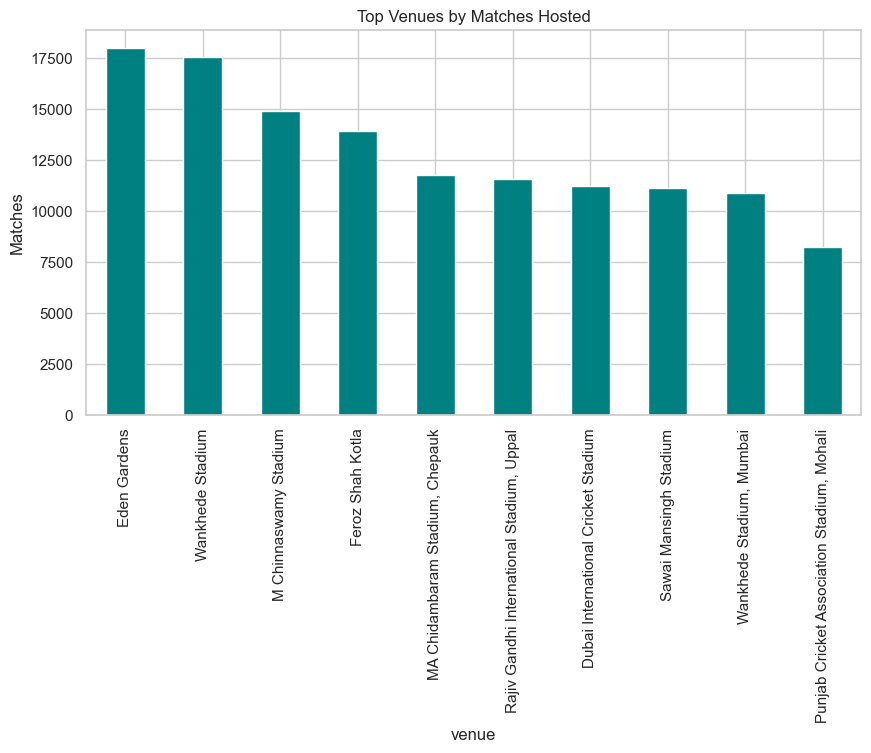

In [11]:
venue_counts = ipl_df['venue'].value_counts().head(10)
venue_counts.plot(kind='bar', color='teal', title='Top Venues by Matches Hosted', figsize=(10,5))
plt.ylabel("Matches")
plt.grid(True)
plt.show()


🔹 Cell 12: Toss Decision vs Match Result
Check how often teams winning the toss also win the match.

In [12]:
toss_win_match_win = ipl_df[ipl_df['toss_winner'] == ipl_df['match_won_by']]
toss_impact_percent = (len(toss_win_match_win) / len(ipl_df)) * 100
print(f"Toss winners also won the match {toss_impact_percent:.2f}% of the time.")

Toss winners also won the match 49.74% of the time.


🔹 Cell 13: Recent Season (IPL 2024) Insights
Use ipl24_df for dedicated analysis of 2024 season.

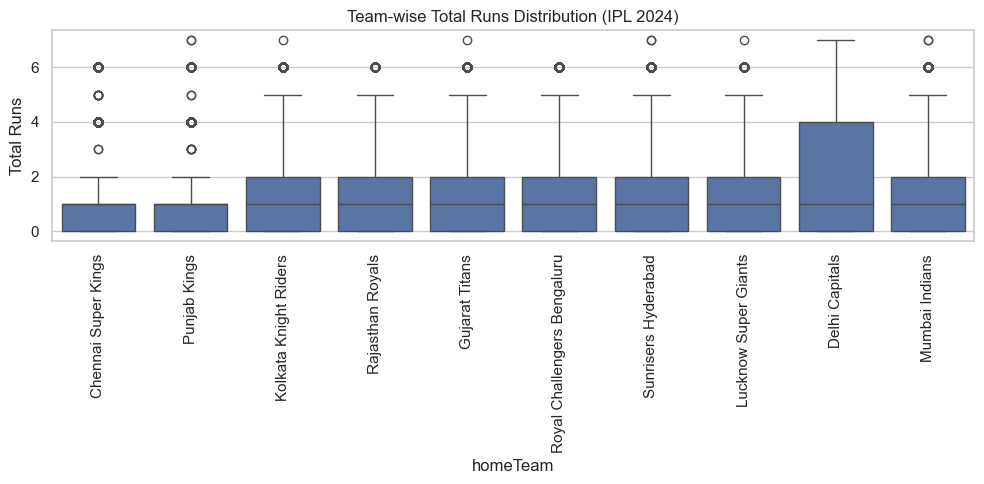

In [13]:
ipl24_df['Total Runs'] = ipl24_df['runs']

plt.figure(figsize=(10, 5))
sns.boxplot(x='homeTeam', y='Total Runs', data=ipl24_df)
plt.xticks(rotation=90)
plt.title('Team-wise Total Runs Distribution (IPL 2024)')
plt.tight_layout()
plt.show()

✅ 1. Top Run Scorers in IPL 2024
You can identify which batters scored the most runs:

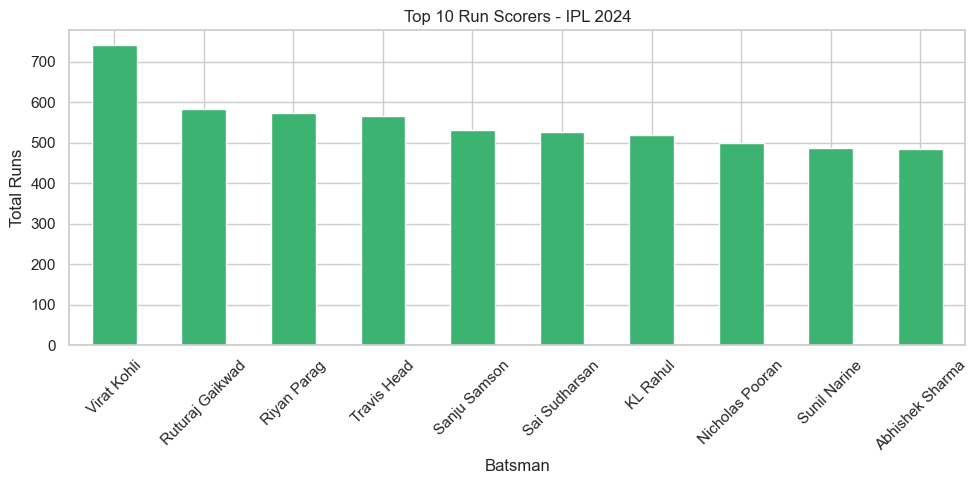

In [14]:
top_scorers = ipl24_df.groupby('batsmanName')['batsmanRuns'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_scorers.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Run Scorers - IPL 2024')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

✅ 2. Most Wickets Taken (Top Bowlers)
Let's find which bowlers took the most wickets:

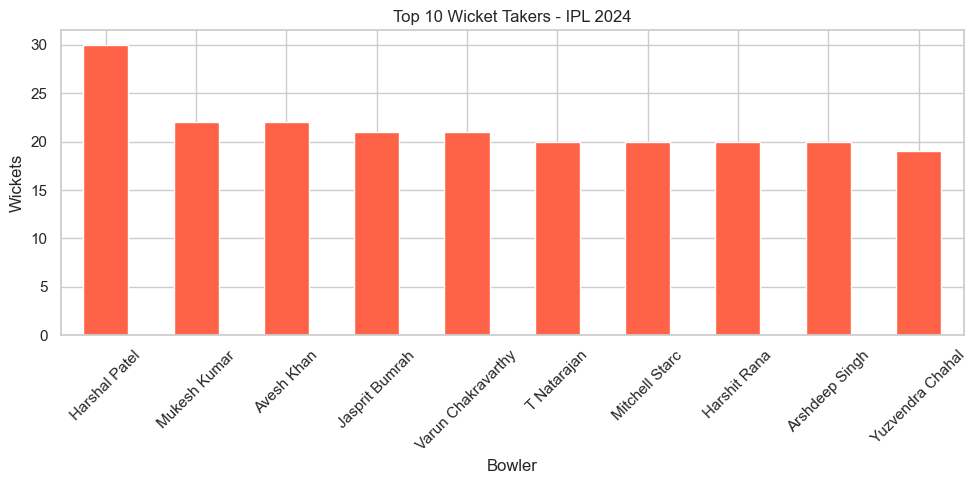

In [15]:
top_bowlers = ipl24_df[ipl24_df['isWicket'] == True].groupby('bowlerName').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_bowlers.plot(kind='bar', color='tomato')
plt.title('Top 10 Wicket Takers - IPL 2024')
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

✅ 3. Boundary Analysis
Number of boundaries (fours and sixes) per batter:

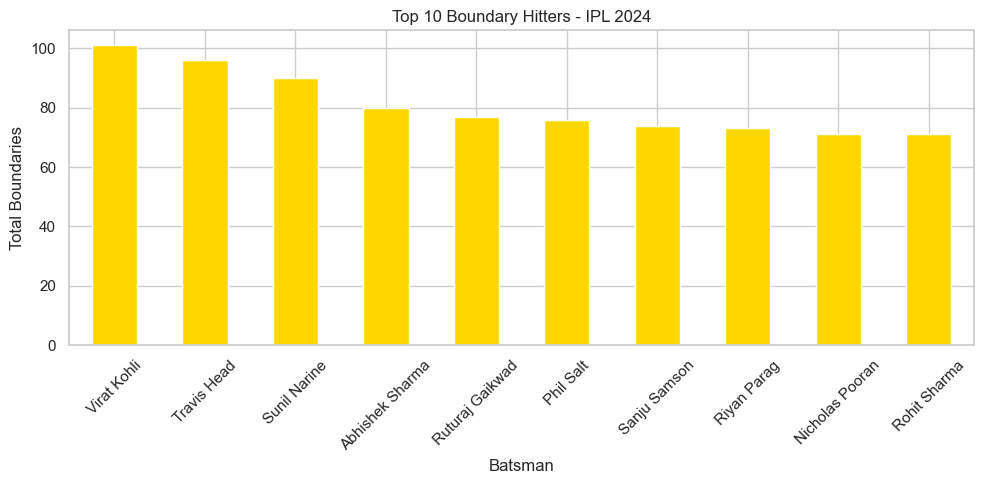

In [16]:
boundaries = ipl24_df[ipl24_df['isBoundary'] == True].groupby('batsmanName').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
boundaries.plot(kind='bar', color='gold')
plt.title('Top 10 Boundary Hitters - IPL 2024')
plt.xlabel('Batsman')
plt.ylabel('Total Boundaries')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

✅ 4. Powerplay Analysis (Overs 1–6)

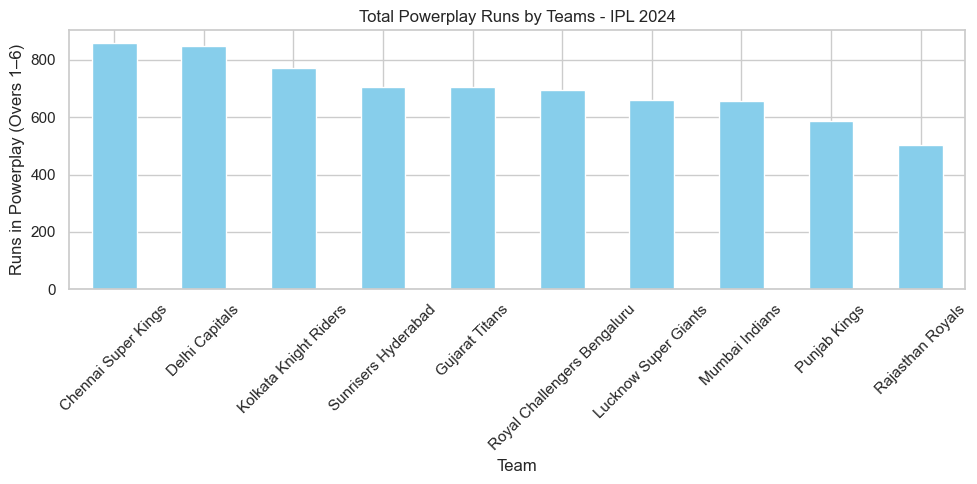

In [17]:
# Filter Powerplay overs (1 to 6)
powerplay_df = ipl24_df[(ipl24_df['over'] >= 1) & (ipl24_df['over'] <= 6)]

# Total runs scored in powerplay by each team
pp_runs = powerplay_df.groupby('homeTeam')['runs'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
pp_runs.plot(kind='bar', color='skyblue')
plt.title('Total Powerplay Runs by Teams - IPL 2024')
plt.xlabel('Team')
plt.ylabel('Runs in Powerplay (Overs 1–6)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

✅ 5. Team-wise Total Runs in the Season

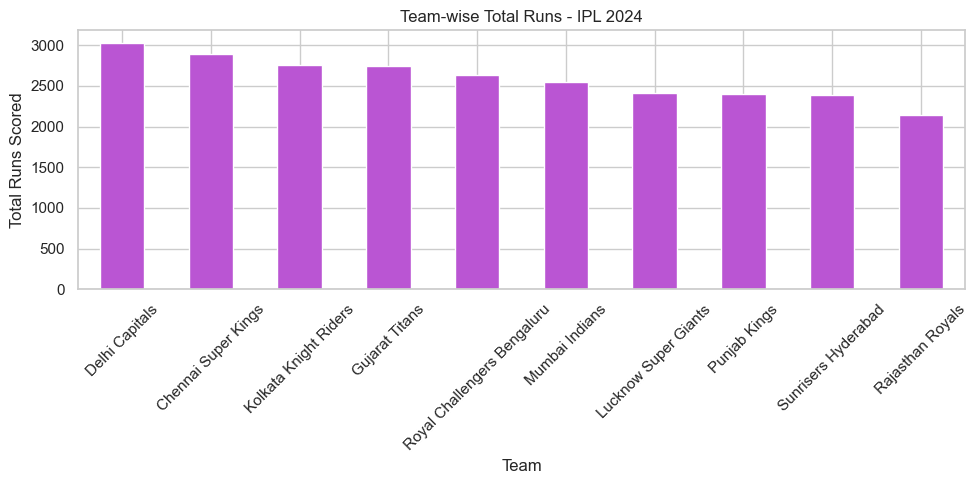

In [18]:
team_runs = ipl24_df.groupby('homeTeam')['runs'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
team_runs.plot(kind='bar', color='mediumorchid')
plt.title('Team-wise Total Runs - IPL 2024')
plt.xlabel('Team')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


✅ 6. Team-wise Wickets Taken

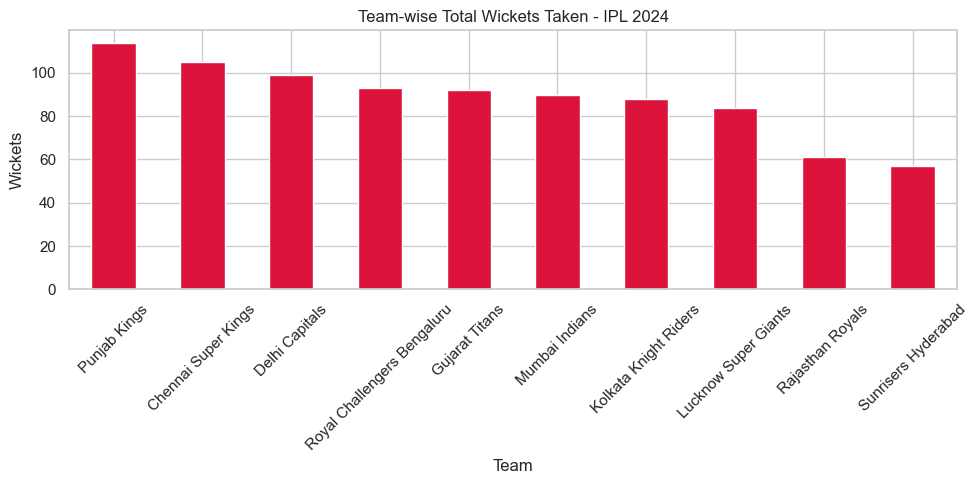

In [19]:
wickets_team = ipl24_df[ipl24_df['isWicket'] == True].groupby('homeTeam').size().sort_values(ascending=False)

plt.figure(figsize=(10,5))
wickets_team.plot(kind='bar', color='crimson')
plt.title('Team-wise Total Wickets Taken - IPL 2024')
plt.xlabel('Team')
plt.ylabel('Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
